In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE = '~/github/ci-analysis/travistorrent_11_1_2017.csv'

In [3]:
dataset = pd.read_csv(FILE, sep=',', engine='c',usecols=['gh_team_size',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'gh_is_pr',
                                                         'gh_pr_created_at',
                                                         'gh_lang',
                                                         'git_branch',
                                                         'gh_num_commits_in_push',
                                                         'git_prev_commit_resolution_status',
                                                         'tr_prev_build',
                                                         'gh_first_commit_created_at',
                                                         'gh_team_size',         
                                                         'gh_pushed_at',
                                                         'gh_build_started_at',
                                                         'tr_log_num_tests_ok',        
                                                         'tr_log_num_tests_failed' ,   
                                                         'tr_log_num_tests_skipped',
                                                         'gh_sloc',
                                                         'tr_log_bool_tests_failed',
                                                         'tr_status'],dtype={ 'tr_build_id': np.float32,
                                                                                            'gh_project_name': 'category',
                                                                                            'gh_is_pr': np.bool,
                                                                                            'gh_pr_created_at': 'category',
                                                                                            'gh_lang': 'category',
                                                                                            'git_branch': 'category',
                                                                                            'gh_num_commits_in_push': np.float32,
                                                                                            'git_prev_commit_resolution_status': 'category',
                                                                                            'tr_prev_build': np.float32,
                                                                                            'gh_first_commit_created_at': 'category',
                                                                                            'gh_team_size': np.int32,
                                                                                            'gh_pushed_at': 'category',
                                                                                            'gh_build_started_at': 'category',
                                                                                            'tr_log_num_tests_ok': np.float32,
                                                                                            'tr_log_num_tests_failed': np.float32,
                                                                                            'tr_log_num_tests_skipped': np.float32,
                                                                                            'gh_sloc': np.int32}, encoding='utf-8')


In [4]:
dataset = dataset.loc[dataset['git_branch'] == 'master']
dataset = dataset[dataset.gh_lang != 'javascript']
dataset = dataset.dropna(subset=['gh_num_commits_in_push']) #Remove NaN da coluna especificada
dataset['gh_pushed_at'] = pd.to_datetime(dataset.gh_pushed_at)
dataset = dataset.drop_duplicates(['tr_build_id']) # No projeto todo


<font size = 4/>
3 - Projeto abaixo de 1000 linhas serão descartados,projeto possuindo acima de 1000 e menos que 10.000 serão considerados pequenos, projetos possuindo acima de 10.000 linhas e menos que 100.000 serão considerados médios e projetos acima de 100.000 linhas serão considerados grandes.

In [5]:
def size_project(language, sett):
    if(sett == 1): #abaixo de 1000 linhas
        df1 = dataset.loc[(dataset['gh_sloc'] < 1000) & (dataset['gh_lang'] == language)]
        df1 = df1.drop_duplicates(['gh_project_name'])
        #print("Projetos {} abaixo de 1000 linhas: {}".format(language, len(df1.gh_project_name)))  

    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = dataset.loc[(dataset['gh_sloc'] < 10000)]
        df2 = df2.loc[(df2['gh_sloc'] > 1000) & (df2['gh_lang'] == language)]
        #df2 = df2.drop_duplicates(['gh_project_name']) # Filtro para quantodade de projetos

        #print("Projetos {} acima de 1000 linhas e abaixo de 10.000 : {}".format(language,len(df2.gh_project_name)))
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = dataset.loc[(dataset['gh_sloc'] < 100000)]
        df3 = df3.loc[(df3['gh_sloc'] > 10000) & (df3['gh_lang'] == language)]
        #df3 = df3.drop_duplicates(['gh_project_name']) # Filtro para quantodade de projetos

        #print("Projetos {} acima de 10.000 linhas e abaixo de 100.000 : {}".format(language,len(df3.gh_project_name)))
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = dataset.loc[(dataset['gh_sloc'] > 100000) & (dataset['gh_lang'] == language)]
        #df4 = df4.drop_duplicates(['gh_project_name']) # Filtro para quantodade de projetos

        #print("Projetos {} acima de 100.000 linhas: {}".format(language,len(df4.gh_project_name)))
        return(df4)        

<font size = 4/>
3.1 Tamanho dos projetos Ruby e Java

In [29]:
# tirar o comentado do metodo para não haver erro
size_project('ruby', 1)
size_project('ruby', 2)
size_project('ruby', 3)
size_project('ruby', 4)
print("\n")
size_project('java', 1)
size_project('java', 2)
size_project('java', 3)
size_project('java', 4)
print("\n")
size_project('javascript', 1)
size_project('javascript', 2)
size_project('javascript', 3)
size_project('javascript', 4)

Projetos ruby abaixo de 1000 linhas: 533
Projetos ruby acima de 1000 linhas e abaixo de 10.000 : 511
Projetos ruby acima de 10.000 linhas e abaixo de 100.000 : 79
Projetos ruby acima de 100.000 linhas: 8


Projetos java abaixo de 1000 linhas: 37
Projetos java acima de 1000 linhas e abaixo de 10.000 : 201
Projetos java acima de 10.000 linhas e abaixo de 100.000 : 191
Projetos java acima de 100.000 linhas: 28


<font size = 4/>
Def para frequencia por dia e mes

In [6]:
def weekday_frequency(dataframe): #year
    #dataframe = dataframe.loc[dataset.gh_pushed_at.dt.year == year]

    dataframe = dataframe.gh_pushed_at.dt.weekday

    monday  = []
    tuesday  = []
    wednesday = []
    thursday  = []
    friday = []
    saturday = []
    sunday = []

    for date in dataframe:
        if(date == 0):
            monday.append(date)
        elif(date == 1):
            tuesday.append(date)
        elif(date == 2):
            wednesday.append(date)
        elif(date == 3):
            thursday.append(date)
        elif(date == 4):
            friday.append(date)
        elif(date == 5):
            saturday.append(date)
        elif(date == 6):
            sunday.append(date)
            
    #print("\nMonday: {} commits \n Tuesday: {} \n wednesday: {} \n Thursday: {} \n Friday: {} \n Saturday: {}\n Sunday: {}".format(len(monday), len(tuesday), len(wednesday), len(thursday), len(friday), len(saturday), len(sunday)))
      
    return([monday, tuesday, wednesday, thursday, friday, saturday, sunday])

In [7]:
def month_frequency(dataframe): #year
    #dataframe = dataframe.loc[dataset.gh_pushed_at.dt.year == year]

    dataframe = dataframe.gh_pushed_at.dt.month
    
    january = []
    february = []
    march = []
    april = []
    may = []
    june = []
    july = []
    august = []
    september = []
    october = []
    november = []
    december = []
    
 
    for month in dataframe:
        if(month == 1):
            january.append(month)
        elif(month == 2):
            february.append(month)
        elif(month == 3):
            march.append(month)
        elif(month == 4):
            april.append(month)
        elif(month == 5):
            may.append(month)
        elif(month == 6):
            june.append(month)
        elif(month == 7):
            july.append(month)
        elif(month == 8):
            august.append(month)
        elif(month == 9):
            september.append(month)
        elif(month == 10):
            october.append(month)
        elif(month == 11):
            november.append(month)
        elif(month == 12):
            december.append(month)
            
    #print("january:{} \n february:{} \n march:{} \n april:{} \n may:{} \n june:{} \n july:{} \n august:{} \n september:{} \n october:{} \n november:{} \n december:{} ".format(len(january), len(february), len(march), len(april), len(may), len(june), len(july), len(august), len(september), len(october), len(november), len(december)))
    return([january, february, march, april, may, june, july, august, september, october, november, december])

In [8]:
def plot_bar(sett, language,low, medium, high):
    
    # Dados do grafico
    if(sett == 0):
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6]),len(low[7]),len(low[8]),len(low[9]),len(low[10]),len(low[11])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6]),len(medium[7]),len(medium[8]),len(medium[9]),len(medium[10]),len(medium[11])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6]),len(high[7]),len(high[8]),len(high[9]),len(high[10]),len(high[11])]

        labels_list = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    if(sett == 1):
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6])]

        labels_list = ['Monday', 'Tuesday','wednesday','thursday ','friday','saturday','sunday']
        
    # Largura das barras
    barWidth = 0.25
    
    # Tamanho do Grafico
    plt.figure(figsize=(9,6))
    
    # Posicao da barras
    r1 = np.arange(len(frequency_low))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    
    # Criando as barras
    plt.bar(r1, frequency_low, color='#6A5ACD', width=barWidth, label='Small')
    plt.bar(r2, frequency_medium, color='#6495ED', width=barWidth, label='Medium')
    plt.bar(r3, frequency_high, color='#00BFFF', width=barWidth, label='Large')
    
    # Adicionando legendas as barras
    if(sett == 0):
        plt.xlabel('Months', fontsize=15)
    if(sett == 1):
        plt.xlabel('Weekday', fontsize=15)
   
    plt.xticks([r + barWidth for r in  range(len(frequency_low))], labels_list)
    plt.ylabel('Project size', fontsize=15)
    plt.title('{}'.format(language), fontsize=15)
    
    
    plt.legend()
    plt.savefig('frequencia_por_dia_semana.eps', format='eps')
    plt.show()
  

<font size = 4/>
3.2 - Frequências de commit por Mês, sendo projetos de tamanho pequeno, médio e grande.

<font size = 4/>
3.2.1 - Projetos RUBY 

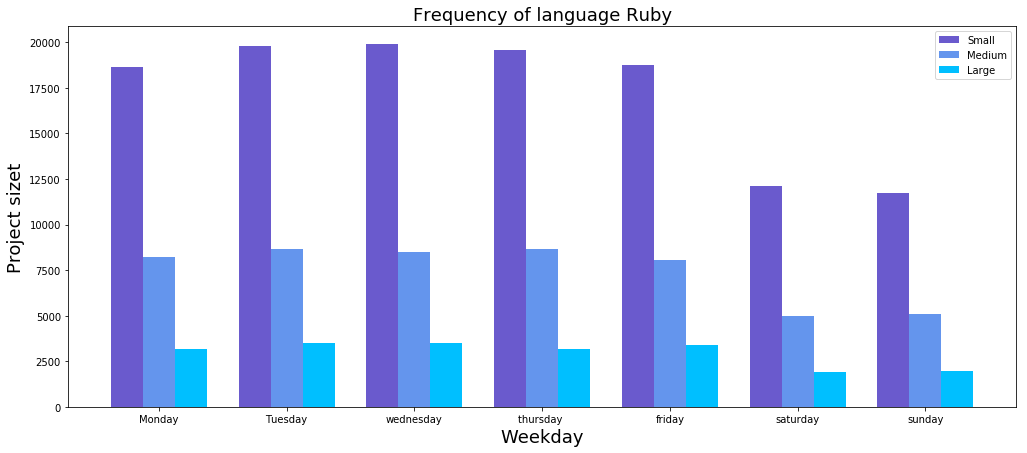

In [9]:
dataframe_l = size_project('ruby', 2)

dataframe_m = size_project('ruby', 3)

dataframe_h = size_project('ruby', 4)


weekday_low = weekday_frequency(dataframe_l)
weekday_medium = weekday_frequency(dataframe_m)
weekday_high = weekday_frequency(dataframe_h)

plot_bar(1, 'Ruby', weekday_low, weekday_medium, weekday_high)

<font size = 4/>
3.2.1 - Projetos Java 

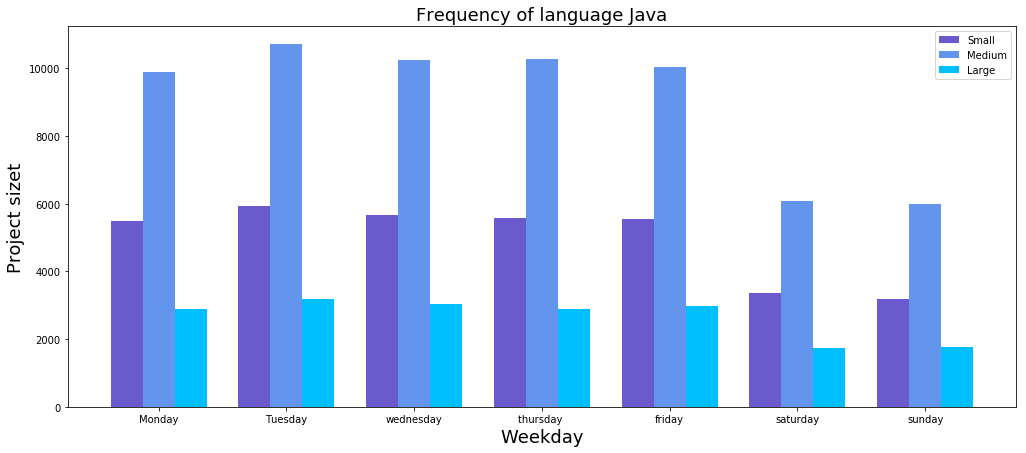

In [10]:
dataframe_l = size_project('java', 2)

dataframe_m = size_project('java', 3)

dataframe_h = size_project('java', 4)



weekday_low = weekday_frequency(dataframe_l)
weekday_medium = weekday_frequency(dataframe_m)
weekday_high = weekday_frequency(dataframe_h)

plot_bar(1, 'Java', weekday_low, weekday_medium, weekday_high)

<font size = 4/>
3.3 - Frequências de commit por Mês, por tamanho do projeto, pequeno, médio e grande.


<font size = 4/>
3.3.1 - Projetos RUBY 

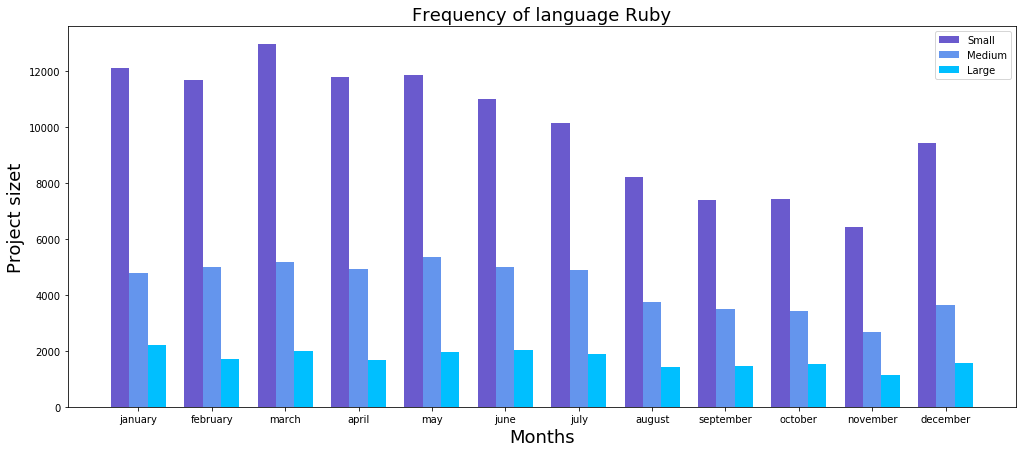

In [11]:
dataframe_l = size_project('ruby', 2)
dataframe_m = size_project('ruby', 3)
dataframe_h = size_project('ruby', 4)

month_low = month_frequency(dataframe_l)
month_medium = month_frequency(dataframe_m)
month_high = month_frequency(dataframe_h)

plot_bar(0, 'Ruby', month_low, month_medium, month_high)

<font size = 4/>
3.3.2 - Projetos Java 

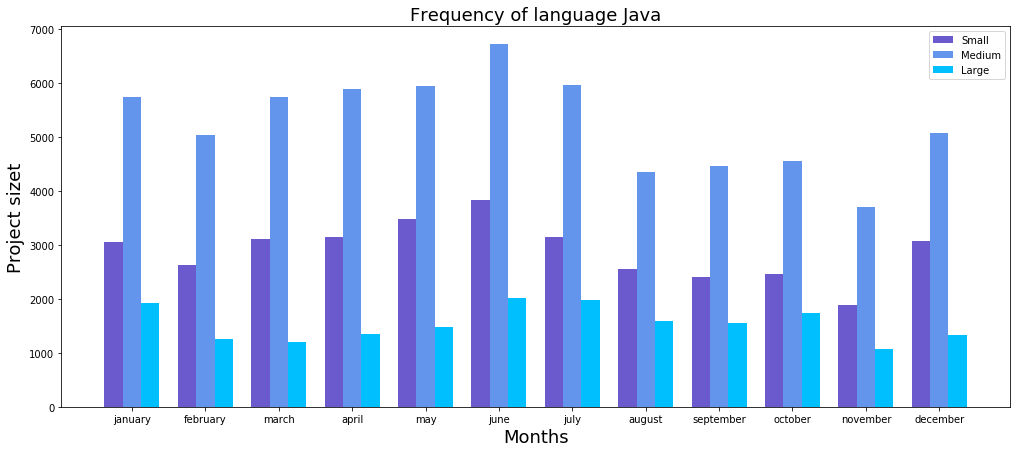

In [12]:
dataframe_l = size_project('java', 2)
dataframe_m = size_project('java', 3)
dataframe_h = size_project('java', 4)

month_low = month_frequency(dataframe_l)
month_medium = month_frequency(dataframe_m)
month_high = month_frequency(dataframe_h)

plot_bar(0, 'Java', month_low, month_medium, month_high)

<font size = 4/>
4 - Boxplot por semana e por mês

In [13]:
def plot_box(title, plot1, plot2, plot3=None, plot4=None, plot5=None, plot6=None, plot7=None, plot8=None, plot9=None, plot10=None, plot11=None, plot12=None):
    
    if(plot8 == None):
        data=[plot1, plot2, plot3, plot4, plot5, plot6, plot7]
    else:
        data=[plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12]
        
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0.08, right=1.48, bottom=0.05, top=1.2,
                        hspace=0.4, wspace=0.3)

    ax.set_axisbelow(True)
    ax.set_title(title, size=20)
    ax.boxplot(data)

In [14]:
def commits_weekday(dataframe):
    weekday = [] 
    for i in range(0, 7):
        day = dataframe.loc[(dataframe.gh_pushed_at.dt.weekday == i)]
        weekday.append(day.gh_num_commits_in_push)
    return(weekday)

In [15]:

dataframe_l = size_project('ruby', 2)
dataframe_m = size_project('ruby', 3)
dataframe_h = size_project('ruby', 4)


weekday_l = commits_weekday(dataframe_l)
weekday_m = commits_weekday(dataframe_m)
weekday_h = commits_weekday(dataframe_h)


In [16]:
# Media de commits para projetos

dia_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday < 5)]
dia_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday < 5)]
dia_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday < 5)]


print('Media para projetos pequenos\n',dia_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios\n',dia_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes\n',dia_semana_h.gh_num_commits_in_push.describe()[0:3])


fim_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday >= 5)]
fim_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday >= 5)]
fim_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday >= 5)]

print('\n\nMedia para projetos pequenos fim de semana\n',fim_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios fim de semana\n',fim_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes fim de semana\n',fim_semana_h.gh_num_commits_in_push.describe()[0:3])

#weekend1, weekend2 = commits_weekend(dataframe_m)
#weekend1, weekend2 = commits_weekend(dataframe_h)

Media para projetos pequenos
 count    96682.000000
mean         2.381281
std          2.658886
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios
 count    42129.000000
mean         2.417195
std          2.727777
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes
 count    16707.000000
mean         3.406476
std          3.751727
Name: gh_num_commits_in_push, dtype: float64


Media para projetos pequenos fim de semana
 count    23794.000000
mean         2.337144
std          2.611799
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios fim de semana
 count    10045.000000
mean         2.431458
std          2.865199
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes fim de semana
 count    3895.000000
mean        3.424390
std         3.711321
Name: gh_num_commits_in_push, dtype: float64


In [17]:
#plot_box('Projetos ruby pequenos - Semana', weekday_l[0], weekday_l[1], weekday_l[2], weekday_l[3], weekday_l[4], weekday_l[5], weekday_l[6])
#plot_box('Projetos ruby médios - Semana', weekday_m[0], weekday_m[1], weekday_m[2], weekday_m[3], weekday_m[4], weekday_m[5], weekday_m[6])
#plot_box('Projetos ruby grandes - Semana', weekday_h[0], weekday_h[1], weekday_h[2], weekday_h[3], weekday_h[4], weekday_h[5], weekday_h[6])

In [18]:
# size project filtra os projetos por tamanho e depois filtra-se por cada dia da semana 
dataframe_l = size_project('java', 2)
dataframe_m = size_project('java', 3)
dataframe_h = size_project('java', 4)


weekday_l = commits_weekday(dataframe_l)
weekday_m = commits_weekday(dataframe_m)
weekday_h = commits_weekday(dataframe_h)


#plot_box('Projetos Java pequenos - Semana', weekday_l[0], weekday_l[1], weekday_l[2], weekday_l[3], weekday_l[4], weekday_l[5], weekday_l[6])
#plot_box('Projetos Java médios - Semana', weekday_m[0], weekday_m[1], weekday_m[2], weekday_m[3], weekday_m[4], weekday_m[5], weekday_m[6])
#plot_box('Projetos Java grandes - Semana', weekday_h[0], weekday_h[1], weekday_h[2], weekday_h[3], weekday_h[4], weekday_h[5], weekday_h[6])

In [19]:
# size project filtra os projetos por tamanho e depois filtra-se por dia de semana e final de semana

dia_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday < 5)]
dia_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday < 5)]
dia_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday < 5)]


print('Media para projetos pequenos\n',dia_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios\n',dia_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes\n',dia_semana_h.gh_num_commits_in_push.describe()[0:3])


fim_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday >= 5)]
fim_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday >= 5)]
fim_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday >= 5)]

print('\n\nMedia para projetos pequenos fim de semana\n',fim_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios fim de semana\n',fim_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes fim de semana\n',fim_semana_h.gh_num_commits_in_push.describe()[0:3])


Media para projetos pequenos
 count    28219.000000
mean         2.143485
std          2.481595
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios
 count    51132.000000
mean         2.261754
std          2.761387
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes
 count    14992.000000
mean         2.367929
std          2.840215
Name: gh_num_commits_in_push, dtype: float64


Media para projetos pequenos fim de semana
 count    6549.000000
mean        2.182318
std         2.611190
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios fim de semana
 count    12088.000000
mean         2.217075
std          2.660982
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes fim de semana
 count    3483.000000
mean        2.295435
std         2.771428
Name: gh_num_commits_in_push, dtype: float64


### Dados dos projetos Pequenos, Medios e Grandes

In [ ]:
#acima de 1000 e menos que 10.000
df_small = dataset.loc[(dataset['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

#acima de 10.000 linhas e menos que 100.000
df_medium = dataset.loc[(dataset['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

#acima de 100.000 linhas
df_large = dataset.loc[(dataset['gh_sloc'] > 100000)]

print("\n\nMédia e desvio padrão dos projetos pequenos\n", df_small.gh_num_commits_in_push.describe())
print("\n\nMédia e desvio padrão dos projetos medios\n", df_medium.gh_num_commits_in_push.describe())
print("\n\nMédia e desvio padrão dos projetos grandes\n", df_large.gh_num_commits_in_push.describe())

#### Media geral de commits

In [1]:
dataset.gh_num_commits_in_push.mean()

NameError: name 'dataset' is not defined

#### Quantidade de projetos abaixo da media

In [ ]:
cont=0

list_name = dataset.gh_project_name.unique().tolist()

for i in range(len(list_name)):

    df = dataset.loc[dataset['gh_project_name'] == list_name[i]]

    mean = df.gh_num_commits_in_push.mean()

    if(mean < 2.36):
        cont +=1

        
print("Total de projetos {} | Projetos com media a baixo de 2: {} ".format(len(list_name), cont))



### Quantidade de builds por projeto

In [18]:
df = dataset.loc[dataset['gh_lang'] == 'java']

list_name = df.gh_project_name.unique().tolist()
list_size = []

for i in range(len(list_name)):

    data = df.loc[df['gh_project_name'] == list_name[i]]

    list_size.append(data.tr_build_id.size)

    

df = pd.Series(list_size, index=list_name)
df.sort_values(ascending=False)

CloudifySource/cloudify                       4538
gradle/gradle                                 3520
SonarSource/sonarqube                         2540
facebook/presto                               2008
orbeon/orbeon-forms                           2006
geoserver/geoserver                           1971
languagetool-org/languagetool                 1816
square/okhttp                                 1815
Graylog2/graylog2-server                      1731
maxcom/lorsource                              1529
caelum/vraptor4                               1502
checkstyle/checkstyle                         1450
jOOQ/jOOQ                                     1399
tananaev/traccar                              1327
querydsl/querydsl                             1293
DSpace/DSpace                                 1268
yegor256/rultor                               1247
dreamhead/moco                                1236
SpongePowered/SpongeAPI                       1214
killbill/killbill              

### How common is allowing the build to stay red for long periods?

In [15]:
df= dataset.loc[dataset['gh_lang'] == 'java']
list_name = df.gh_project_name.unique().tolist()

In [16]:
passed = df.loc[df['tr_status'] == 'passed']
failed = df.loc[df['tr_status'] == 'failed']
print('Projetos Java')
print('Total de builds que passaram {}'.format(passed.size))
print('Total de builds que NÃO passaram {}'.format(failed.size))

Projetos Java
Total de builds que passaram 1754498
Total de builds que NÃO passaram 308807


In [28]:
passed = []
failed = []
for i in range(len(list_name)):
    project = df.loc[df['gh_project_name'] == list_name[i]] 
    _passed = project.loc[project['tr_status'] == 'passed']
    _failed = project.loc[project['tr_status'] == 'failed']
    
    passed.append(_passed.size)
    failed.append(_failed.size)

In [38]:
len(failed)

378

{'whiskers': [<matplotlib.lines.Line2D at 0x7efcf967ba20>,
 'caps': [<matplotlib.lines.Line2D at 0x7efcf47dcbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efcf967bb70>,
 'medians': [<matplotlib.lines.Line2D at 0x7efcf90ccc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efcf90ccb38>,
 'means': []}

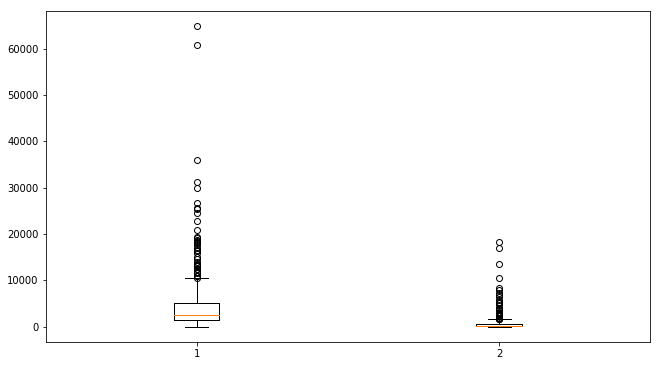

In [49]:
data=[passed, failed]

fig, ax = plt.subplots()

fig.subplots_adjust(left=0.08, right=1.48, bottom=0.05, top=1.2, hspace=0.4, wspace=0.3)

ax.set_axisbelow(True)
ax.set_title('', size=20)
ax.boxplot(data)

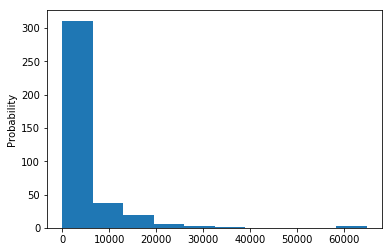

In [43]:

plt.hist(passed, normed=False, bins=10)
plt.ylabel('Probability');

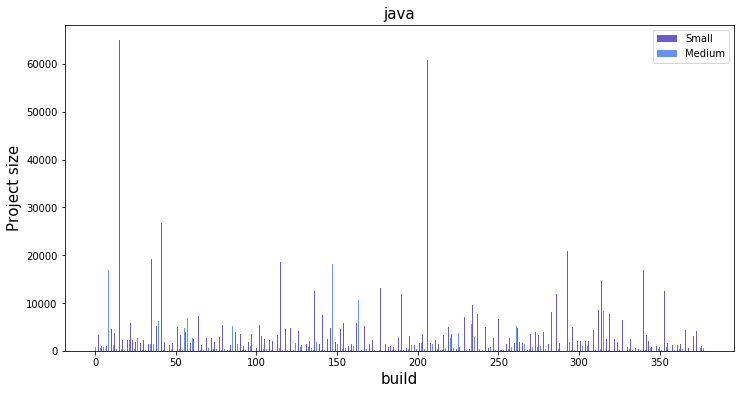

In [51]:

frequency_low = passed
frequency_medium = failed
labels_list = ['Monday', 'Tuesday','wednesday','thursday ','friday','saturday','sunday']

# Largura das barras
barWidth = 0.25

# Tamanho do Grafico
plt.figure(figsize=(12,6))

# Posicao da barras
r1 = np.arange(len(frequency_low))
r2 = [x + barWidth for x in r1]


# Criando as barras
plt.bar(r1, frequency_low, color='#6A5ACD', width=barWidth, label='Small')
plt.bar(r2, frequency_medium, color='#6495ED', width=barWidth, label='Medium')
#plt.bar(r3, frequency_high, color='#00BFFF', width=barWidth, label='Large')

# Adicionando legendas as barras

plt.xlabel('build', fontsize=15)


#plt.xticks([r + barWidth for r in  range(len(frequency_low))], labels_list)
plt.ylabel('Project size', fontsize=15)
plt.title('{}'.format('java'), fontsize=15)


plt.legend()
#plt.savefig('frequencia_por_dia_semana.eps', format='eps')
plt.show()
